<a href="https://colab.research.google.com/github/007soham/pal/blob/master/dataprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#How to predict stock market data
# using Long Short Term memory

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
#Get the stock quote--

df = web.DataReader('ICICIBANK.BO',data_source='yahoo',start='2009-03-08',end='2020-02-08')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-03-09,49.509102,46.909100,48.181801,47.809101,27670687.0,23.447287
2009-03-12,52.400002,48.545399,48.545399,51.681801,43481361.0,25.346592
2009-03-13,56.872700,52.854500,52.854500,56.127300,45582185.0,27.526823
2009-03-16,58.981800,55.854500,56.545399,58.663601,32929892.0,28.770723
2009-03-17,61.272701,57.299999,58.927299,58.936401,51407939.0,28.904509
...,...,...,...,...,...,...
2020-02-03,518.799988,502.000000,504.750000,515.599976,482256.0,515.599976
2020-02-04,534.500000,516.799988,520.549988,530.599976,6884253.0,530.599976
2020-02-05,540.000000,526.000000,530.599976,538.900024,4732141.0,538.900024


In [13]:
df.shape

(233, 6)

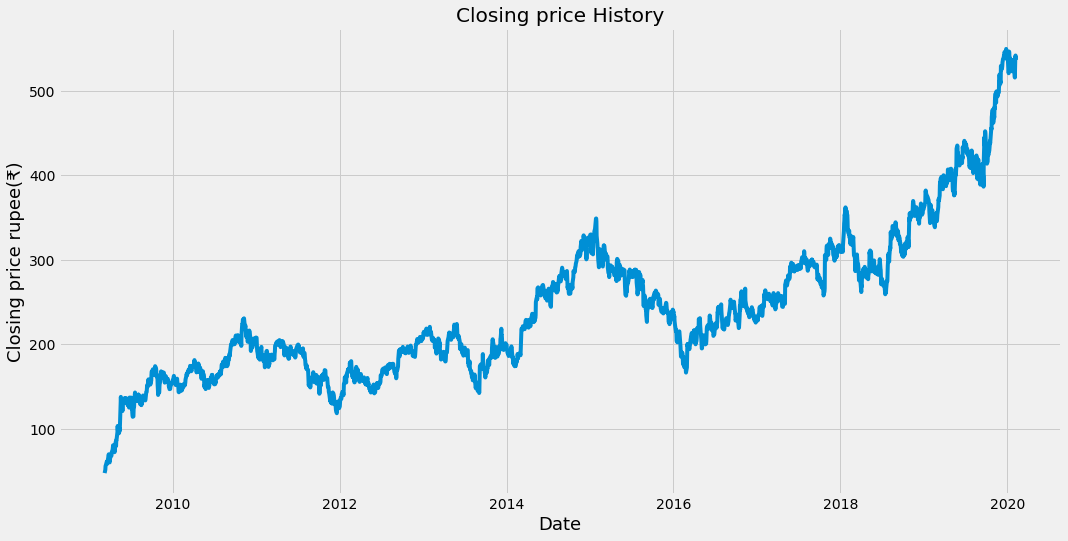

In [26]:
#Visualize the closing price history--
plt.figure(figsize = (16,8))
plt.title('Closing price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price rupee(₹)', fontsize=18)
plt.show()

In [27]:
#Create a new data frame with only Closing price--
data = df.filter(['Close'])

#Convert the data frame to a numpay array--
dataset = data.values

#Get the number of rows to train the model --
training_data_len =math.ceil((len(dataset)*.8))
training_data_len

2148

In [28]:
#Scale the data--
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00772083],
       [0.01658363],
       ...,
       [0.97906661],
       [0.98454916],
       [0.97408247]])

In [40]:
#create the training data set--
 #Create the scaled training data set
 train_data = scaled_data[0 : training_data_len, : ]

 #Split the data into x_train & y_train data set--
 x_train = []
 y_train = []
 for i in range (60, len(train_data)):
   x_train.append(train_data[i-60  :  i, 0])
   y_train.append(train_data[i,0])
   if (i <= 62):
      print(x_train)
      print(y_train)
      print()


[array([0.        , 0.00772083, 0.01658363, 0.02164014, 0.02218401,
       0.02618927, 0.02724052, 0.02173085, 0.03033986, 0.03340271,
       0.03726323, 0.04032629, 0.0443136 , 0.0271861 , 0.02524686,
       0.03135483, 0.03526958, 0.04048937, 0.04117798, 0.04884458,
       0.055315  , 0.06551873, 0.05924788, 0.06470313, 0.05930231,
       0.04924332, 0.04975071, 0.05823292, 0.06145904, 0.07430896,
       0.06394194, 0.07786126, 0.07786126, 0.09645669, 0.1111003 ,
       0.10071594, 0.10372457, 0.09339364, 0.09442674, 0.10718674,
       0.10392393, 0.09922967, 0.11291253, 0.16574444, 0.17966414,
       0.16161357, 0.14838167, 0.15943848, 0.15970962, 0.14631624,
       0.16224754, 0.1691157 , 0.17317678, 0.16683296, 0.1701863 ,
       0.16556499, 0.17083822, 0.17696472, 0.16721376, 0.1713087 ])]
[0.17575059538607518]

[array([0.        , 0.00772083, 0.01658363, 0.02164014, 0.02218401,
       0.02618927, 0.02724052, 0.02173085, 0.03033986, 0.03340271,
       0.03726323, 0.04032629, 0.04

In [0]:
#Convert x_train and y_train to numpy arrays---
x_train,y_train = np.array(x_train), np.array(y_train)

#Reshape the data(2D--3D)--(LSTM need 3D shape)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [0]:
#Built the LSTM Model--
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
#Compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [50]:
#train the model--
model.fit(x_train,y_train,batch_size= 1, epochs= 1)

Epoch 1/1
2088/2088 [==============================] - 137s 66ms/step - loss: 2.7484e-04


In [0]:
#create new data set
#create anew array creating scaled values from index()
test_data = scaled_data[training_data_len-60 : , : ]

#create  data sets x_test & y-test--
x_test = []
y_test = dataset[training_data_len :, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])

In [0]:
#Convert the data in a numpay array--
x_test = np.array(x_test)

In [0]:
#Reshape the data--
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
#Get the models predicted price values--
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [56]:
#To evaluate the model(using RMSE method)---
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.435523929880627

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


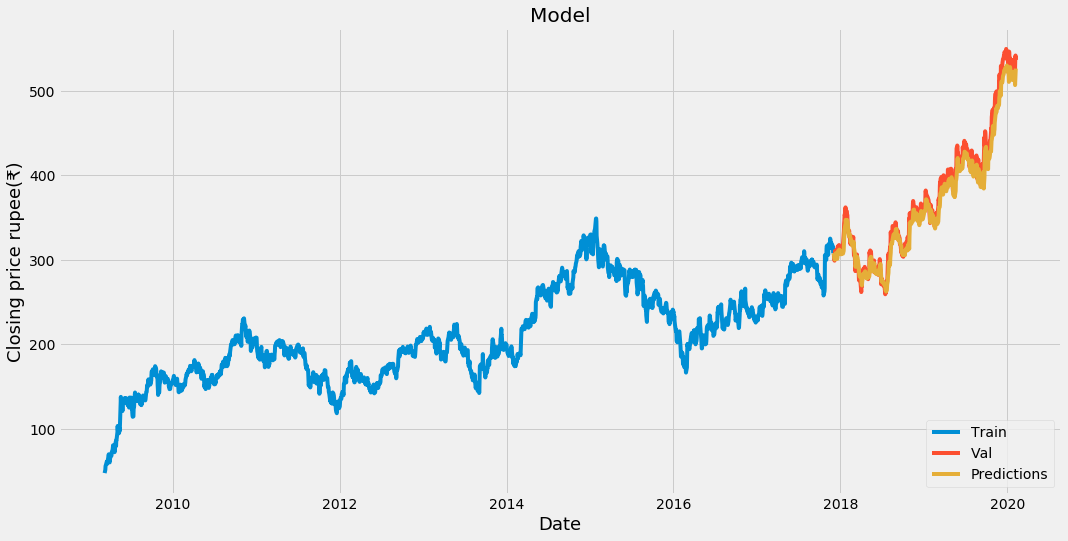

In [64]:
#plot the data--
train = data[: training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions

#Visualize the data--
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing price rupee(₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [68]:
##To get a prediction of a particular date---
# get the quote--
icic_quote = web.DataReader('ICICIBANK.BO',data_source='yahoo',start='2009-03-08',end='2020-02-08')

#create a new data frame --
new_df = icic_quote.filter(['Close'])

#Get the last 60 days closing price values and convert the data frame to an array--
last_60_days = new_df[-60 : ].values

#Scale the data between 0 to 1--
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list--
x_test = []

#Append the last 60 days--
x_test.append(last_60_days_scaled)

#Convert x data set into numpy array--
x_test = np.array(x_test)


#reshape--
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

#Get the predicted price--
pred_price = model.predict(x_test)

#Undo the scaling--
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[523.62506]]


In [69]:
#To see the acctual price--
 #Get the quote--

icic_quote2 = web.DataReader('ICICIBANK.BO',data_source='yahoo',start='2020-02-09',end='2020-02-09')
print(icic_quote2['Close'])


Date
2020-02-10    533.900024
Name: Close, dtype: float64
